In [39]:
#  importing the tensorflow and keras directories
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np

from tensorflow.keras import models
from tensorflow.keras.models import Sequential

#  importing the utilities from keras
from keras.utils import to_categorical
from keras.utils.vis_utils import model_to_dot
from keras.datasets import boston_housing

In [40]:
# splitting the boston dataset

(x_train,y_train,) , (x_test,y_test) = boston_housing.load_data()


In [41]:
# Data Preprocessing

# checking the shapes of training and test data

print (x_train.shape)
print (x_test.shape)
print(y_train.shape)
print(y_test.shape)


(404, 13)
(102, 13)
(404,)
(102,)


In [42]:
# checking the 1st instance of x_train 

x_train[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [43]:
# cheking the 1st instance of y_train

y_train[0]

15.2

** from the above result we find that the dataset has 506 instances and 13 independent variables

In [44]:
# normalising the training data

x_train = tf.keras.layers.UnitNormalization()(x_train)
x_test = tf.keras.layers.UnitNormalization()(x_test)

In [45]:
# rechecking if this standardisation has happened
print(x_train[10])

tf.Tensor(
[0.01242039 0.         0.02342809 0.         0.000897   0.00828914
 0.12943694 0.00212147 0.03106487 0.86205006 0.02614626 0.4868253
 0.02628864], shape=(13,), dtype=float32)


In [46]:
print(x_test[0])

tf.Tensor(
[0.02675675 0.         0.02677953 0.         0.0010046  0.00951931
 0.14795321 0.0027145  0.03550877 0.9853684  0.02988655 0.04031725
 0.04298041], shape=(13,), dtype=float32)


In [47]:
#build Neural with 2 hidden layers

def HousePricePredictionModel():

  model = models.Sequential()
  model.add(Dense(128,activation = 'relu',input_shape = (x_train[0].shape)))
  model.add(Dense(64,activation = 'relu'))
  model.add(Dense(32,activation = 'relu'))
  model.add(Dense(1))
  model.compile( optimizer='rmsprop',loss='mse', metrics='mae')
  return model

In [54]:
# defining parameters
BATCH_SIZE = 1         # this is a hyperparameter; this is the number of instances that will be processed in one go
EPOCH = 200            # the number of times the operations happen 

In [55]:
# fitting and training the model

model = HousePricePredictionModel()
history = model.fit(x_train,y_train,batch_size = BATCH_SIZE, epochs = EPOCH,verbose = 1, validation_data=(x_test,y_test))

Epoch 1/200
404/404 [==============================] - 2s 3ms/step - loss: 130.6162 - mae: 8.1047 - val_loss: 67.7538 - val_mae: 6.0764
Epoch 2/200
404/404 [==============================] - 1s 3ms/step - loss: 68.1697 - mae: 5.8331 - val_loss: 58.8492 - val_mae: 5.6041
Epoch 3/200
404/404 [==============================] - 1s 3ms/step - loss: 61.0970 - mae: 5.4274 - val_loss: 70.6167 - val_mae: 5.8929
Epoch 4/200
404/404 [==============================] - 1s 4ms/step - loss: 60.4048 - mae: 5.3272 - val_loss: 59.9177 - val_mae: 5.4804
Epoch 5/200
404/404 [==============================] - 1s 3ms/step - loss: 58.1264 - mae: 5.3148 - val_loss: 53.3383 - val_mae: 5.4820
Epoch 6/200
404/404 [==============================] - 1s 2ms/step - loss: 56.9885 - mae: 5.1908 - val_loss: 54.5097 - val_mae: 5.2486
Epoch 7/200
404/404 [==============================] - 2s 5ms/step - loss: 55.3521 - mae: 4.8566 - val_loss: 55.7475 - val_mae: 5.2448
Epoch 8/200
404/404 [==============================] -

In [56]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 128)               1792      
                                                                 
 dense_36 (Dense)            (None, 64)                8256      
                                                                 
 dense_37 (Dense)            (None, 32)                2080      
                                                                 
 dense_38 (Dense)            (None, 1)                 33        
                                                                 
Total params: 12,161
Trainable params: 12,161
Non-trainable params: 0
_________________________________________________________________


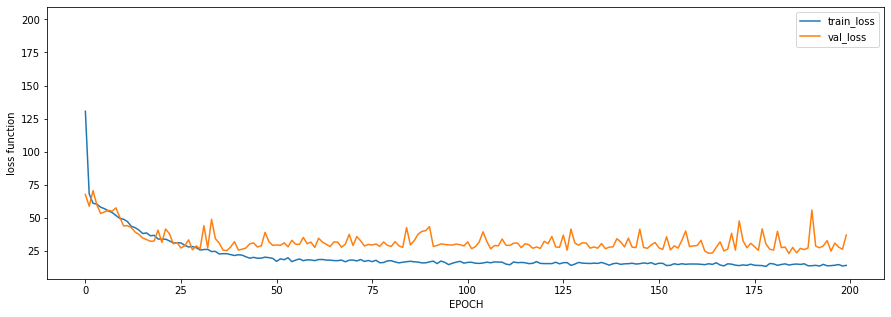

In [58]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot([EPOCH])
plt.ylabel('loss function')
plt.xlabel('EPOCH')
plt.legend(['train_loss','val_loss'],loc = 'upper right')
plt.show()
